<a href="https://colab.research.google.com/github/Droganderon/Colab/blob/main/DataAnalisys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler

##Гистограмма

In [5]:
data = [23, 34, 45, 67, 23, 56, 78, 89, 43, 65, 34, 56, 76]

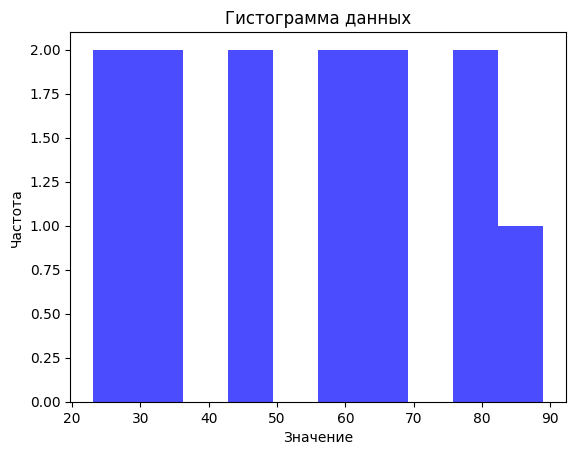

In [6]:
plt.hist(data, bins=10, color='blue', alpha=0.7)
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.title('Гистограмма данных')
plt.show()

##Диаграмма рассеяния

In [7]:
x = [1, 2, 3, 4, 5, 6, 7, 8]
y = [15, 25, 30, 40, 50, 60, 70, 80]

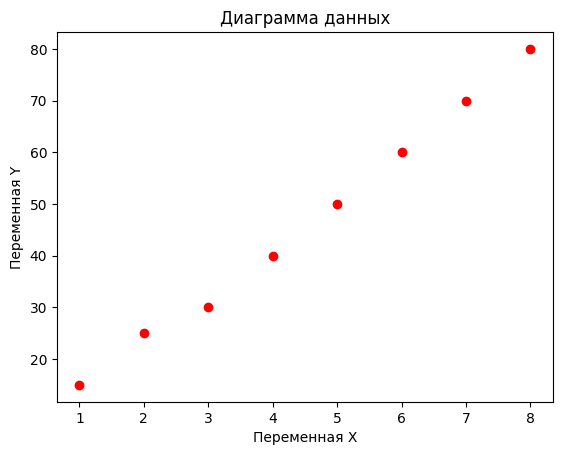

In [8]:
plt.scatter(x, y, color='red')
plt.xlabel('Переменная X')
plt.ylabel('Переменная Y')
plt.title('Диаграмма данных')
plt.show()

##Ящик с усами

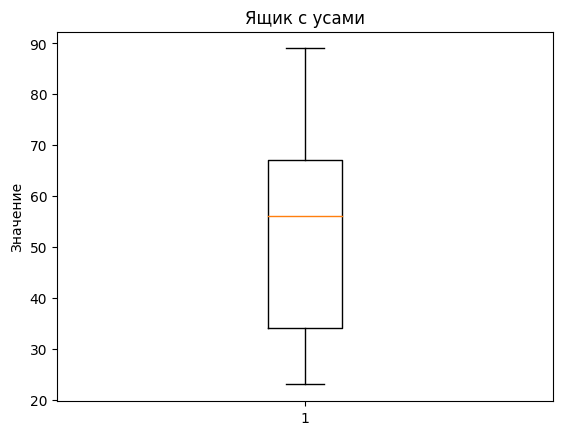

In [9]:
plt.boxplot(data)
plt.ylabel('Значение')
plt.title('Ящик с усами')
plt.show()

##Тепловые карты

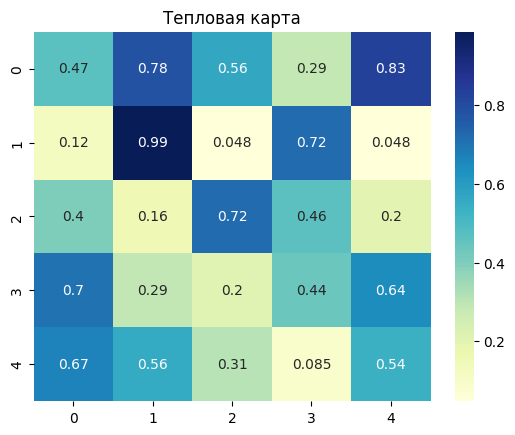

In [11]:
data2 = np.random.rand(5, 5)
sns.heatmap(data2, annot=True, cmap='YlGnBu')
plt.title('Тепловая карта')
plt.show()

#Эстетика

In [30]:
sns.heatmap(data2.corr(), annot=True, vmin=1, vmax=1, center=0, cmap='coolwarm', linewidths=3, linecolor='black')

AttributeError: 'list' object has no attribute 'corr'

##Нахождение Среднего, Медианы и моды

In [18]:
data3 = np.random.randint(1, 100, 20)
mean = np.mean(data3)
print('Среднее:',mean)

Среднее: 58.3


In [19]:
median = np.median(data3)
print('Медиана:',median)

Медиана: 55.0


In [20]:
mode = stats.mode(data3)
print('Мода:',mode)

Мода: ModeResult(mode=53, count=2)


##Корреляция

In [21]:
x1 = np.array([1, 2, 3, 4, 5, 6])
y1 = np.array([2, 3, 4, 4, 5, 7])
correlation = np.corrcoef(x1, y1)[0, 1]
print('Коэффициент корреляции:',correlation)

Коэффициент корреляции: 0.9620403678338525


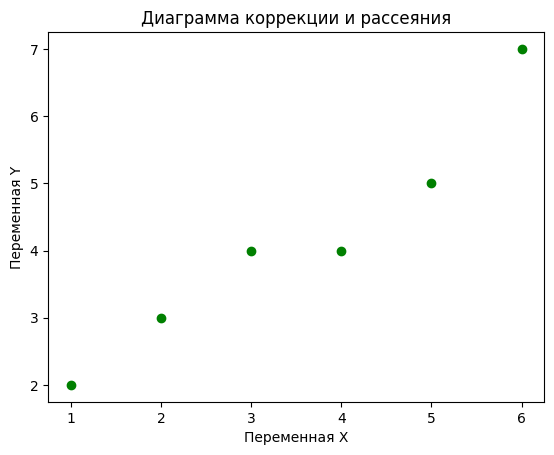

In [22]:
plt.scatter(x1, y1, color='green')
plt.xlabel('Переменная X')
plt.ylabel('Переменная Y')
plt.title('Диаграмма коррекции и рассеяния')
plt.show()

## Нормализация и Стандартизация данных

In [25]:
data4 = np.array([[1,2],
                  [2,3],
                  [3,4],
                  [4,5]])

In [26]:
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data4)
print('Нормализованные данные:')
print(normalized_data)

Нормализованные данные:
[[0.         0.        ]
 [0.33333333 0.33333333]
 [0.66666667 0.66666667]
 [1.         1.        ]]


In [27]:
scaler2 = StandardScaler()
standardized_data = scaler2.fit_transform(data4)
print('Стандартизованные данные:')
print(standardized_data)

Стандартизованные данные:
[[-1.34164079 -1.34164079]
 [-0.4472136  -0.4472136 ]
 [ 0.4472136   0.4472136 ]
 [ 1.34164079  1.34164079]]


##Анализ выбросов и аномалий

#*Шаги* разведочного анализа данных

##А. Загрузка и первичный осмотр данных

In [34]:
dataDA = pd.read_csv('/content/sales_data.csv')
print(dataDA.head())

ParserError: Error tokenizing data. C error: Expected 5 fields in line 22, saw 6


##В. Обработка пропущенных значений

In [ ]:
mean_price = dataDA['Цена'].mean()
dataDA['Цена'].fillna(mean_price, inplace=True)

##С. Анализ распределения переменных

In [ ]:
plt.hist(dataDA['Цена'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.title('Распределение цен на продукты')
plt.show()

##D. Исследование карреляции между переменными

In [ ]:
correlation2 = dataDA['Цена'].corr(dataDA['Количество'])
print('Корреляция между ценой и количеством продаж:',correlation2)

##E. Выявление выбросов и аномалий

In [ ]:
plt.boxplot(dataDA['Количество'])
plt.ylabel('Количество')
plt.title('Анализ выбросов в количестве продаж')
plt.show()

##F. Изучение категориальных переменных

In [28]:
product_counts = dataDA['Продукт'].value_counts()
product_counts.plot(kind='bar')
plt.xlabel('Продукт')
plt.ylabel('Частота продаж')
plt.title('Частота продаж продуктов')
plt.xticks(rotation=45)
plt.show()

##G. Визуализация результатов EDA

In [ ]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.hist(dataDA['Цена'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.title('Распределение цен на продукты')

plt.subplot(2, 2, 2)
plt.scatter(dataDA['Цена'], dataDA['Количество'], color='green')
plt.xlabel('Цена')
plt.ylabel('Количество')
plt.title('Диаграмма рассеяния между ценой и количеством продаж')

plt.subplot(2, 2, 3)
plt.boxplot(dataDA['Количество'])
plt.ylabel('Количество')
plt.title('Анализ выбросов в количестве продаж')

plt.tight_layout()
plt.show()